# **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Vishal\Desktop\Spark internship\Task 1\Dataset\student_scores - student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Percentage score')

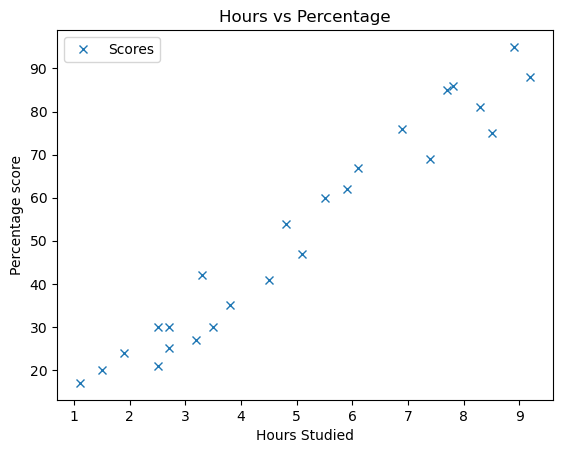

In [3]:
data.plot(x='Hours', y='Scores', style = 'x')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# Preparing the Data

In [4]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

Let's split the data into training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 0)

In [6]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [7]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [8]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [9]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Training the Algorithm

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

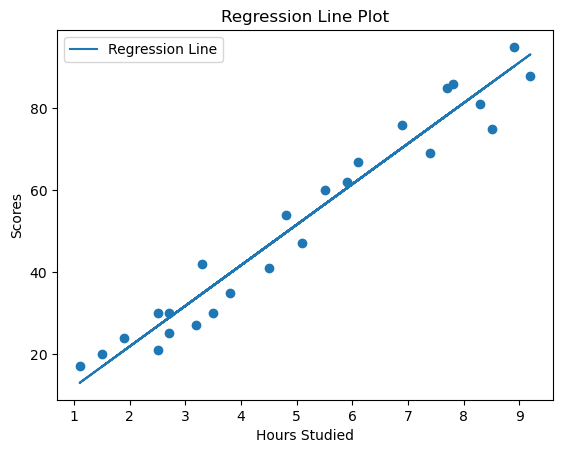

In [11]:
# Predict using the mode
line = model.coef_*x + model.intercept_
plt.scatter(x,y)
plt.plot(x, line, label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Regression Line Plot')
plt.legend()
plt.show()


The positive slope indicates that as study hours increase, scores tend to increase.

# Predictions

In [12]:
y_pred = model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [13]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
hours = 9.25
my_pred = model.predict([[hours]])
print('No of hours = {}'.format(hours))
print('my predicion score = {}'.format(my_pred[0]))

No of hours = 9.25
my predicion score = 93.69173248737538


# Evaluating the model

In [16]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


* The error is the difference between the predicted value and the actual value. MAE value is 4.183859899002975.

* In our case, an MAE of 4.18 means that your model's predictions are, on average, 4.18 units off from the actual values, providing a measure of how well our model is performing.